In [1]:
# import depedencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy as sq
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
Measurement

sqlalchemy.ext.automap.measurement

# Exploratory Climate Analysis

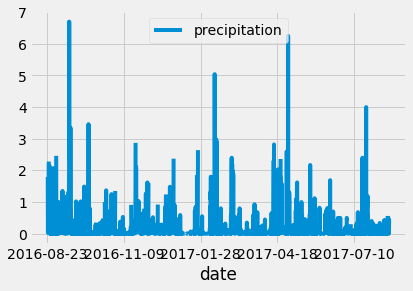

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23)
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)

# Sort the dataframe by date
df = df.sort_index()
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

In [12]:
df.head()

,date,precipitation
date,,
2016-08-23,2016-08-23,0.00
2016-08-23,2016-08-23,NaN
2016-08-23,2016-08-23,1.79
2016-08-23,2016-08-23,0.05
2016-08-23,2016-08-23,0.15


In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [14]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [15]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

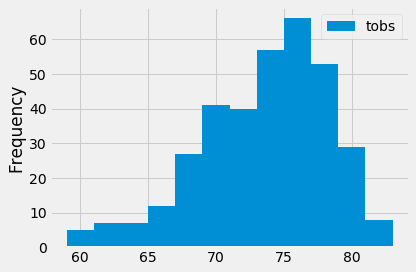

In [17]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12)
plt.tight_layout()

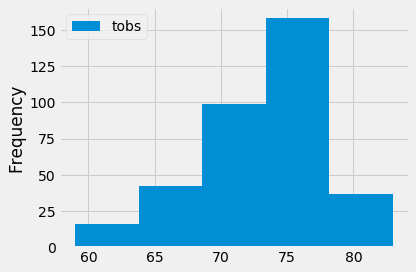

In [18]:
df.plot.hist(bins=5)
plt.tight_layout()

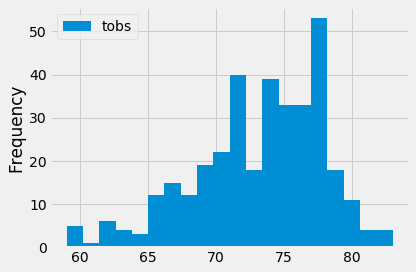

In [19]:
df.plot.hist(bins=20)
plt.tight_layout()

In [20]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge

In [21]:
# set up database in tables
connection = engine.connect()
metadata = sq.MetaData()
measurement = sq.Table('measurement', metadata, autoload=True, autoload_with=engine)
station=sq.Table('station', metadata, autoload=True,autoload_with= engine)

In [22]:
# find column names in measurement table
print(measurement.columns.keys())

['id', 'station', 'date', 'prcp', 'tobs']


In [23]:
# find column names in station table
print(station.columns.keys())

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']


In [24]:
# bring measurement table into pandas dataframe
measurement_df = pd.read_sql_table('measurement',con=engine,parse_dates='date')

In [25]:
measurement_df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [26]:
measurement_df.tail()

,id,station,date,prcp,tobs
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0
19549,19550,USC00516128,2017-08-23,0.45,76.0


In [27]:
# confirm data types
measurement_df.dtypes

id                  int64
station            object
date       datetime64[ns]
prcp              float64
tobs              float64
dtype: object

In [28]:
# extract month from date
measurement_df['month'] = pd.DatetimeIndex(measurement_df['date']).month
measurement_df.sample(5)

,id,station,date,prcp,tobs,month
18440,18441,USC00516128,2014-05-16,0.18,71.0,5
11740,11741,USC00519523,2016-05-01,0.09,78.0,5
17253,17254,USC00516128,2010-11-27,0.15,69.0,11
16005,16006,USC00511918,2012-12-05,0.08,72.0,12
2225,2226,USC00519397,2016-04-07,0.00,73.0,4


In [29]:
measurement_df.dtypes

id                  int64
station            object
date       datetime64[ns]
prcp              float64
tobs              float64
month               int64
dtype: object

In [30]:
# create June dataframe by pulling out all entries with month = 6
June_df = measurement_df.loc[measurement_df['month'] == 6]
June_df.head()

,id,station,date,prcp,tobs,month
133,134,USC00519397,2010-06-01,0.00,78.0,6
134,135,USC00519397,2010-06-02,0.01,76.0,6
135,136,USC00519397,2010-06-03,0.00,78.0,6
136,137,USC00519397,2010-06-04,0.00,76.0,6
137,138,USC00519397,2010-06-05,0.00,77.0,6


In [31]:
June_df.tail()

,id,station,date,prcp,tobs,month
19492,19493,USC00516128,2017-06-26,0.02,79.0,6
19493,19494,USC00516128,2017-06-27,0.10,74.0,6
19494,19495,USC00516128,2017-06-28,0.02,74.0,6
19495,19496,USC00516128,2017-06-29,0.04,76.0,6
19496,19497,USC00516128,2017-06-30,0.20,75.0,6


In [32]:
# create Dec dataframe by pulling out all entries with month = 12
Dec_df = measurement_df.loc[measurement_df['month'] == 12]
Dec_df.head()

,id,station,date,prcp,tobs,month
305,306,USC00519397,2010-12-01,0.04,76.0,12
306,307,USC00519397,2010-12-03,0.00,74.0,12
307,308,USC00519397,2010-12-04,0.00,74.0,12
308,309,USC00519397,2010-12-06,0.00,64.0,12
309,310,USC00519397,2010-12-07,0.00,64.0,12


In [33]:
# get descriptive statistics for June precipitation data
June_prcp = pd.DataFrame(June_df['prcp'].describe())
June_prcp = June_prcp.rename({'prcp':'June Precip'}, axis='columns')
June_prcp.reset_index(inplace=True)
June_prcp

,index,June Precip
0,count,1574.000000
1,mean,0.136360
2,std,0.335731
3,min,0.000000
4,25%,0.000000
5,50%,0.020000
6,75%,0.120000
7,max,4.430000


In [34]:
# get descriptive statistics for June temperature data
June_temp = pd.DataFrame(June_df['tobs'].describe())
June_temp = June_temp.rename({'tobs':'June Temps'}, axis='columns')
June_temp.reset_index(inplace=True)
June_temp

,index,June Temps
0,count,1700.000000
1,mean,74.944118
2,std,3.257417
3,min,64.000000
4,25%,73.000000
5,50%,75.000000
6,75%,77.000000
7,max,85.000000


In [35]:
# get descriptive statistics for December precipitation data
Dec_prcp = pd.DataFrame(Dec_df['prcp'].describe())
Dec_prcp = Dec_prcp.rename({'prcp':'Dec Precip'}, axis='columns')
Dec_prcp.reset_index(inplace=True)
Dec_prcp

,index,Dec Precip
0,count,1405.000000
1,mean,0.216819
2,std,0.541399
3,min,0.000000
4,25%,0.000000
5,50%,0.030000
6,75%,0.150000
7,max,6.420000


In [36]:
# get descriptive statistics for December temperature data
Dec_temp = pd.DataFrame(Dec_df['tobs'].describe())
Dec_temp = Dec_temp.rename({'tobs':'Dec Temps'}, axis='columns')
Dec_temp.reset_index(inplace=True)
Dec_temp

,index,Dec Temps
0,count,1517.000000
1,mean,71.041529
2,std,3.745920
3,min,56.000000
4,25%,69.000000
5,50%,71.000000
6,75%,74.000000
7,max,83.000000


In [37]:
# combine and clean up Precipitation df's
Precip_df = pd.concat([June_prcp,Dec_prcp], axis=1)
Precip_df = Precip_df.rename({'index':'Stats'}, axis='columns')
Precip_df = Precip_df.loc[:,~Precip_df.columns.duplicated()]
Precip_df

,Stats,June Precip,Dec Precip
0,count,1574.000000,1405.000000
1,mean,0.136360,0.216819
2,std,0.335731,0.541399
3,min,0.000000,0.000000
4,25%,0.000000,0.000000
5,50%,0.020000,0.030000
6,75%,0.120000,0.150000
7,max,4.430000,6.420000


In [38]:
# combine and clean up Temperature df's
Temps_df = pd.concat([June_temp,Dec_temp], axis=1)
Temps_df = Temps_df.rename({'index':'Stats'}, axis='columns')
Temps_df = Temps_df.loc[:,~Temps_df.columns.duplicated()]
Temps_df

,Stats,June Temps,Dec Temps
0,count,1700.000000,1517.000000
1,mean,74.944118,71.041529
2,std,3.257417,3.745920
3,min,64.000000,56.000000
4,25%,73.000000,69.000000
5,50%,75.000000,71.000000
6,75%,77.000000,74.000000
7,max,85.000000,83.000000


In [39]:
labels = Temps_df['Stats'].tolist()
labels

['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']

In [40]:
labels = labels[1:]
labels

['mean', 'std', 'min', '25%', '50%', '75%', 'max']

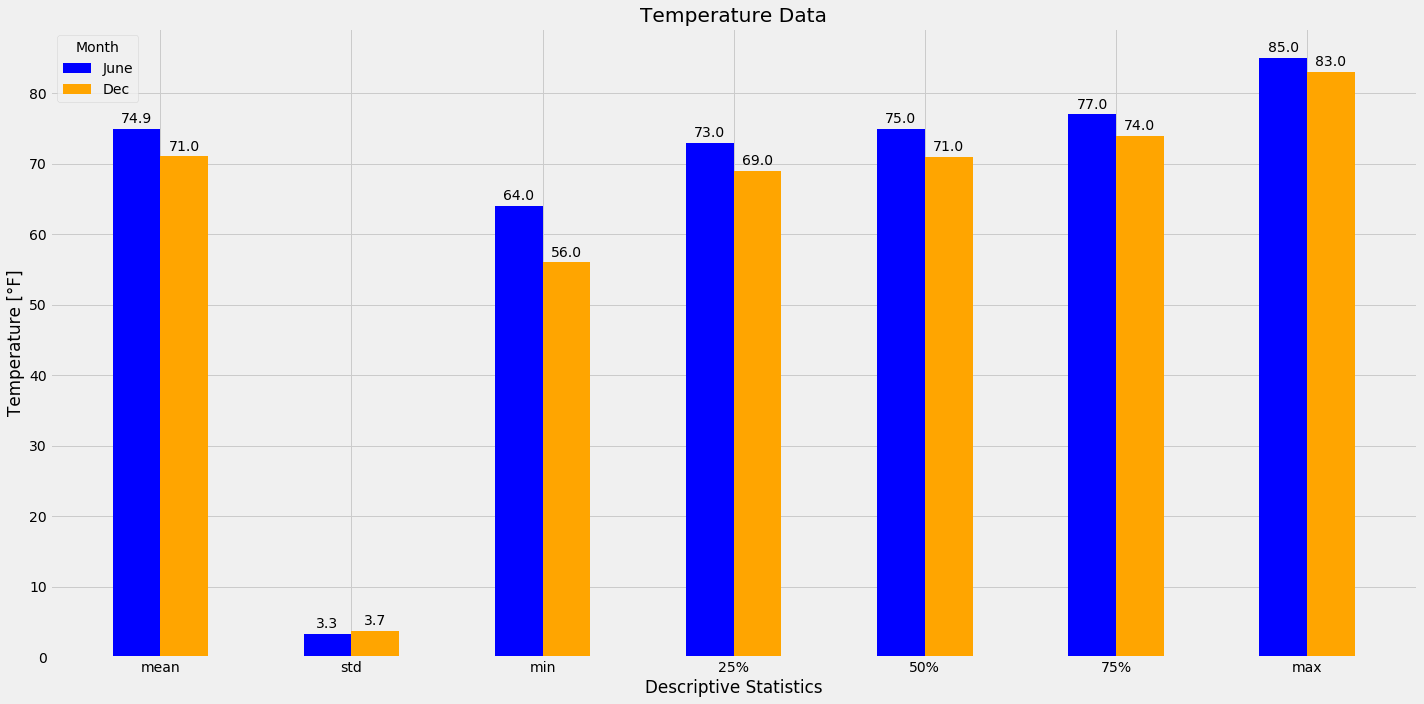

In [71]:
# plot Temperature data
# have to remove the count row because it throws off the chart
labels = Temps_df['Stats'].tolist()
labels = labels[1:]
June_temps = Temps_df['June Temps'].tolist()
June_temps = June_temps[1:]
Dec_temps = Temps_df['Dec Temps'].tolist()
Dec_temps = Dec_temps[1:]

x = np.arange(len(labels))
w = 0.25

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(x-w/2,June_temps,w,label='June', color='b')
rects2 = ax.bar(x+w/2,Dec_temps,w,label='Dec', color='orange')

ax.set_title('Temperature Data')
ax.set_xlabel('Descriptive Statistics')
ax.set_ylabel('Temperature [°F]')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(title='Month')


def autolabel(rects):
    # """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.1f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

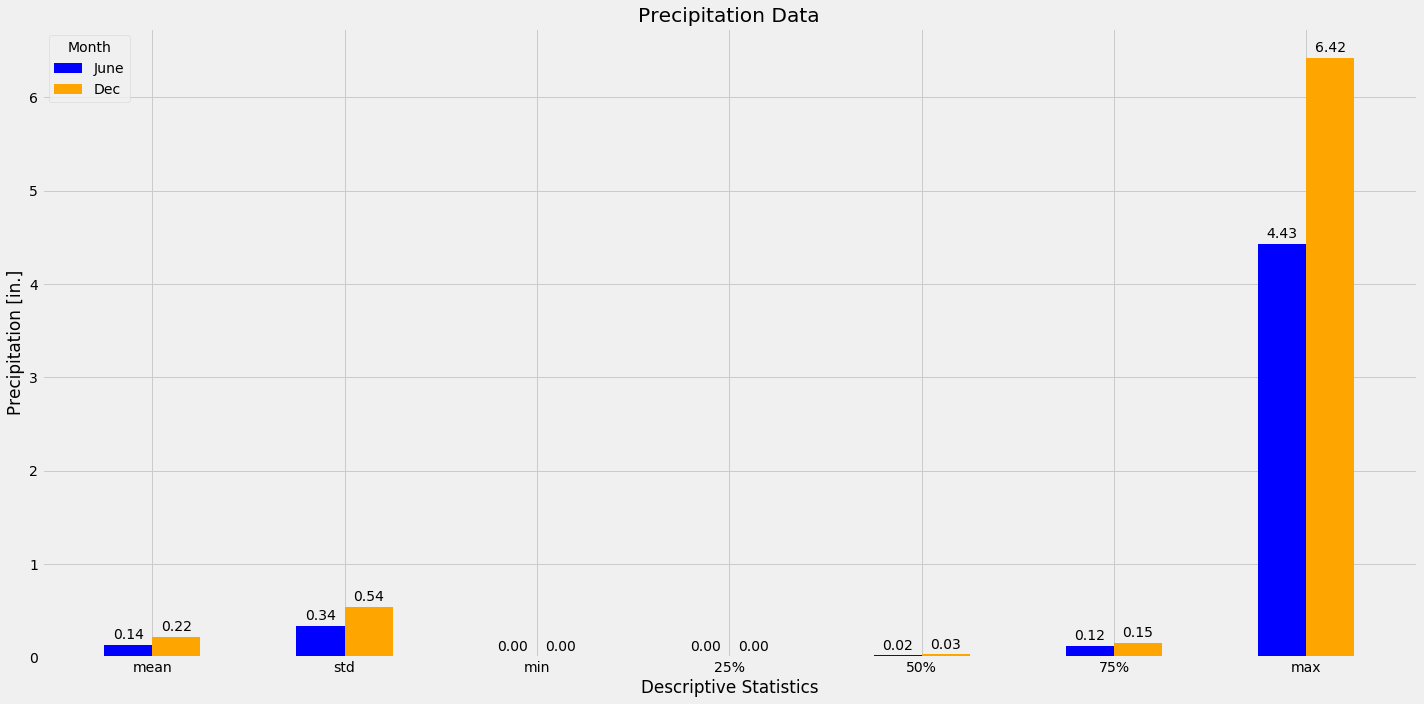

In [70]:
# plot Temperature data
# have to remove the count row because it throws off the chart
labels = Precip_df['Stats'].tolist()
labels = labels[1:]
June_precip = Precip_df['June Precip'].tolist()
June_precip = June_precip[1:]
Dec_precip = Precip_df['Dec Precip'].tolist()
Dec_precip = Dec_precip[1:]

x = np.arange(len(labels))
w = 0.25

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(x-w/2,June_precip,w,label='June', color='b')
rects2 = ax.bar(x+w/2,Dec_precip,w,label='Dec', color='orange')

ax.set_title('Precipitation Data')
ax.set_xlabel('Descriptive Statistics')
ax.set_ylabel('Precipitation [in.]')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(title='Month')


# auto label (found at https://matplotlib.org/3.3.0/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py)

def autolabel(rects):
    # """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()


plt.show()